In [1]:
import pandas as pd

In [2]:
column_names = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
                "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine = pd.read_csv("wine.data", names = column_names, header= None)
wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

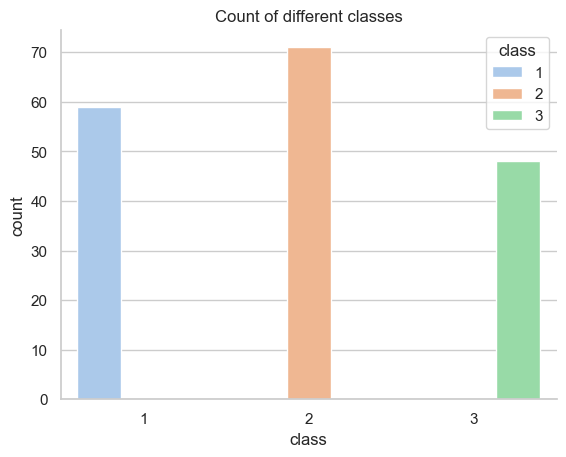

In [4]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", palette="pastel", rc = custom_params)
sns.axes_style("whitegrid")
sns.countplot(data = wine, x = "class", hue = "class");
plt.title("Count of different classes")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import numpy as np
df = np.array(wine)
X = df[:, 1:]
y = df[:, 0]

In [7]:
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [8]:
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [10]:
X_norm = MinMaxScaler().fit_transform(X)

10 selected features


In [12]:
print(X_norm)

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


In [13]:
chi_selector = SelectKBest(chi2)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
#chi_feature = X.loc[:,chi_support].columns.tolist()
X = pd.DataFrame(X)
chi_feature = X.columns[chi_support].tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [14]:
print(chi_feature)

[0, 1, 5, 6, 7, 8, 9, 10, 11, 12]


In [15]:
chi_selector = SelectKBest(chi2, k = 6)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
#chi_feature = X.loc[:,chi_support].columns.tolist()
X = pd.DataFrame(X)
chi_feature = X.columns[chi_support].tolist()
print(str(len(chi_feature)), 'selected features')

6 selected features


In [16]:
print(chi_feature)

[0, 5, 6, 9, 11, 12]
